In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import glob
import random
from collections import defaultdict
from pathlib import Path

from IPython.display import display

import pandas as pd

from tqdm import tqdm
import jax
jax.config.update('jax_platform_name', 'cpu')

In [2]:


sys.path.append("../..")

from lib import utils as U
from lib.ehr.dataset import load_dataset
from lib.ehr.inpatient_interface import Inpatients

In [3]:
import logging
logging.root.level = logging.DEBUG


In [4]:
# Assign the folder of the dataset to `DATA_FILE`.
import dask

HOME = os.environ.get('HOME')
DATA_DIR = f'{HOME}/GP/ehr-data'
SOURCE_DIR = os.path.abspath("..")

with U.modified_environ(DATA_DIR=DATA_DIR), dask.config.set(scheduler='processes'):
    m4inpatient_dataset = load_dataset('M4ICU')
   

DEBUG:root:Loading dataframe files
DEBUG:fsspec.local:open file: /home/asem/GP/ehr-data/mimic4icu-cohort/adm_df.csv
DEBUG:fsspec.local:open file: /home/asem/GP/ehr-data/mimic4icu-cohort/dx_df.csv
DEBUG:fsspec.local:open file: /home/asem/GP/ehr-data/mimic4icu-cohort/static_df.csv
DEBUG:fsspec.local:open file: /home/asem/GP/ehr-data/mimic4icu-cohort/obs_df.csv
DEBUG:fsspec.local:open file: /home/asem/GP/ehr-data/mimic4icu-cohort/int_input.csv
DEBUG:fsspec.local:open file: /home/asem/GP/ehr-data/mimic4icu-cohort/int_proc.csv
DEBUG:root:[DONE] Loading dataframe files
DEBUG:root:Matching admission_id
DEBUG:root:[DONE] Matching admission_id
DEBUG:root:Time casting..
DEBUG:root:[DONE] Time casting..
DEBUG:absl:Constructing dx_icd9 (<class 'lib.ehr.coding_scheme.DxICD9'>) scheme
DEBUG:absl:Constructing dx_icd10 (<class 'lib.ehr.coding_scheme.DxICD10'>) scheme
DEBUG:absl:Constructing dx_icd9 (<class 'lib.ehr.coding_scheme.DxICD9'>) scheme
DEBUG:absl:Constructing dx_icd9 (<class 'lib.ehr.coding_

In [5]:
len(m4inpatient_dataset.df['obs'])

101972691

In [6]:
len(m4inpatient_dataset.df['obs'])

101972691

In [7]:
splits = m4inpatient_dataset.random_splits([0.8, 0.9], 42, 'subjects')



In [8]:
preprocessing = m4inpatient_dataset.fit_preprocessing(splits[0])

In [9]:

m4inpatient_dataset.apply_preprocessing(preprocessing)

DEBUG:root:Removed 2320851 (0.023) outliers from obs


In [77]:
# from concurrent.futures import ThreadPoolExecutor
# with dask.config.set(pool=ThreadPoolExecutor(12)):
with dask.config.set(scheduler='processes'):
    m4inaptients = Inpatients(m4inpatient_dataset, splits[0][:20], num_workers=12)

DEBUG:root:Loading subjects..
/home/asem/GP/ICENODE/notebooks/mimic_icu/../../lib/ehr/dataset.py:942: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  dob = anchor_date + anchor_age
DEBUG:root:Extracting dx codes...
DEBUG:root:[DONE] Extracting dx codes
DEBUG:root:Extracting dx codes history...
DEBUG:root:[DONE] Extracting dx codes history
DEBUG:root:Extracting outcome...
DEBUG:root:[DONE] Extracting outcome
DEBUG:root:Extracting procedures...
DEBUG:root:[DONE] Extracting procedures
DEBUG:root:Extracting inputs...
DEBUG:root:[DONE] Extracting inputs
DEBUG:root:Extracting observables...
DEBUG:root:obs: filter adms
DEBUG:root:obs: dasking
DEBUG:root:obs: groupby
DEBUG:root:obs: undasking
DEBUG:root:obs: extract
DEBUG:root:obs: empty
DEBUG:root:[DONE] Extracting observables
DEBUG:root:Compiling admissions...
DEBUG:root:[DONE] Loading subjects


In [78]:
m4inaptients.size_in_bytes / 1024 ** 3

0.0031393850222229958

In [79]:
m4inaptients_jax = m4inaptients.to_jax_arrays(splits[0][:10])

In [80]:
m4inaptients_jax.size_in_bytes / 1024 ** 3

0.0011605145409703255

In [81]:
len(m4inaptients_jax.subjects)

10

In [82]:
m4inaptients_jax.n_admissions

28

In [83]:
m4inaptients.n_segments

4840

In [84]:
m4inaptients.n_obs_times

3419

In [85]:
m4inaptients.p_obs

0.227634785999805

In [86]:
m4inaptients.subjects

{14825539: Inpatient(
   subject_id=14825539,
   static_info=InpatientStaticInfo(
     gender='M',
     date_of_birth=Timestamp('2136-01-01 00:00:00'),
     ethnicity=bool[5](numpy),
     ethnicity_scheme=<lib.ehr.coding_scheme.MIMIC4Eth5 object at 0x7f14a0fd61f0>,
     constant_vec=bool[6](numpy)
   ),
   admissions=[
     InpatientAdmission(
       admission_id=24350756,
       admission_dates=(
         Timestamp('2181-01-27 13:21:00'),
         Timestamp('2181-02-02 13:15:00')
       ),
       dx_codes=CodesVector(
         vec=bool[17375](numpy),
         scheme=<lib.ehr.coding_scheme.DxICD9 object at 0x7f14a0f14850>
       ),
       dx_codes_history=CodesVector(
         vec=bool[17375](numpy),
         scheme=<lib.ehr.coding_scheme.DxICD9 object at 0x7f14a0f14850>
       ),
       outcome=CodesVector(
         vec=bool[2081](numpy),
         scheme=<lib.ehr.outcome.OutcomeExtractor object at 0x7f14a10b7790>
       ),
       observables=[
         InpatientObservables(
          

In [90]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/47/b9/6c0daa9b953a80b4e6933bf6a11a2d0633f257e84ee5995c5fd35de564c9/matplotlib-3.7.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/aa/58/9054d2d3d475c4222c084c81f6f2047c2aed31d42e706757268bb1159f69/fonttools-4.41.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 1.7 MB/s eta 0:00:001.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.5 MB/s eta 0:00:00m eta 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Obtaining dependency information for importlib-resources>=3.2.0 from https://files.pythonhosted.org/packages/29/d1/bed03eca30aa05aaf6e0873de091f9385c48705c4a607c2dfe3edbe543e8/importlib_resources-6

DEBUG:matplotlib:matplotlib data path: /home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/asem/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/asem/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/asem/.cache/matplotlib/fontlist-v330.json
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='sc

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.ttf', name='cmr10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/GP/env/icenode-dev/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.tt

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/msttcorefonts/georgiab.ttf', name='Georgia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/C059-Italic.otf', name='C059', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Norasi-Bold.ttf', name='Norasi', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Karum

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', name='Liberation Sans', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/msttcorefonts/Arial_Bold_Italic.ttf', name='Arial', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 7.698636363636363
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/msttcorefonts/ariali.ttf', name='Arial', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-gujr-extra/aakar-medium.ttf', name='aakar', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(Fo

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/msttcorefonts/trebucbi.ttf', name='Trebuchet MS', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Kinnari-Bold.ttf', name='Kinnari', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-Bold.ttf', name='Umpush', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/Sarai/Sarai.ttf', name='Sarai', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/URWBookman-Light.otf'

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-beng-extra/LikhanNormal.ttf', name='Likhan', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Norasi-BoldItalic.ttf', name='Norasi', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusSans-Regular.otf', name='Nimbus Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/.local/share/fonts/Unknown Vendor/TrueType/HelveticaNeue/HelveticaNeue_Italic.ttf', name='HelveticaNeue', style='italic', variant='normal', weight=5, stretch='normal', size='scalable')) = 11.42525
DEBUG:matplotlib.font_manager:findfont:

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Kinnari.ttf', name='Kinnari', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/malayalam/Dyuthi-Regular.ttf', name='Dyuthi', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/samyak-fonts/Samyak-Tamil.ttf', name='Samyak Tamil', style='normal', variant='normal', weight=500, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationSerif-Italic.ttf', name='Liberation Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tru

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf', name='Garuda', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-Bold.ttf', name='Sawasdee', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Laksaman-Italic.ttf', name='Laksaman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', name='Liberation Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/msttcorefonts/arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 6.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/TlwgMono-Oblique.ttf', name='Tlwg Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/StandardSymbolsPS.otf', name='Standard Symbols PS', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-beng-extra/MitraMono.ttf', name='Mitra ', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/lohit-kannada/Lohit-Kannada.ttf', name='Lohit Kannada', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/teluguvijayam/PottiSreeramulu.ttf', name='Potti Sreeramulu', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/liberation2/LiberationMono-Bold.ttf', name='Liberation Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/asem/.local/share/fonts/Macromedia / Made with Fontographer/TrueType/HelveticaNeue/HelveticaNeue_Bold.ttf', name='HelveticaNeue', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/ttf-khmeros-core/KhmerOSsys.ttf', name='Khmer OS System', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/msttcorefonts/courbi.ttf', name='Courier New', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/malayalam/Manjari-Thin.otf', name='Manjari', style='normal', variant='normal', weight=100, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Umpush-Oblique.ttf', name='Umpush', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/d

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Light.ttf', name='Rasa', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-BoldOblique.ttf', name='Sawasdee', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fon

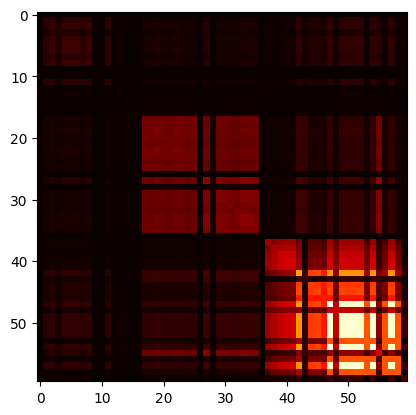

In [91]:
import numpy as np
import matplotlib.pyplot as plt

a = m4inaptients.obs_coocurrence_matrix
a = np.array(a)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

In [92]:
a

array([[   1,    1,    1, ...,    1,    1,    0],
       [   1,  146,  145, ...,  142,   20,   30],
       [   1,  145,  212, ...,  177,   28,   37],
       ...,
       [   1,  142,  177, ..., 2821, 1449,  194],
       [   1,   20,   28, ..., 1449, 1464,   23],
       [   0,   30,   37, ...,  194,   23,  236]], dtype=int32)

In [93]:
s = m4inaptients_jax.subjects[splits[0][0]]

In [96]:
s

Inpatient(
  subject_id=14825539,
  static_info=InpatientStaticInfo(
    gender='M',
    date_of_birth=Timestamp('2136-01-01 00:00:00'),
    ethnicity=bool[5],
    ethnicity_scheme=<lib.ehr.coding_scheme.MIMIC4Eth5 object at 0x7f14a0fd61f0>,
    constant_vec=bool[6]
  ),
  admissions=[
    InpatientAdmission(
      admission_id=24350756,
      admission_dates=(
        Timestamp('2181-01-27 13:21:00'),
        Timestamp('2181-02-02 13:15:00')
      ),
      dx_codes=CodesVector(
        vec=bool[17375],
        scheme=<lib.ehr.coding_scheme.DxICD9 object at 0x7f14a0f14850>
      ),
      dx_codes_history=CodesVector(
        vec=bool[17375],
        scheme=<lib.ehr.coding_scheme.DxICD9 object at 0x7f14a0f14850>
      ),
      outcome=CodesVector(
        vec=bool[2081],
        scheme=<lib.ehr.outcome.OutcomeExtractor object at 0x7f14a10b7790>
      ),
      observables=[
        InpatientObservables(time=f32[0], value=f16[0,60], mask=bool[0,60]),
        InpatientObservables(time=f32[

In [95]:
m4inaptients_jax.outcome_frequency_partitions(5, splits[0][:10])

DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(int32[], weak_type=True), ShapedArray(bool[2081])]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[CpuDevice(id=0)]]
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(int32[], weak_type=True), ShapedArray(int32[2081], weak_type=True)]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[CpuDevice(id=0)]]
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArray(int32[2081], weak_type=True), ShapedArray(int32[2081], weak_type=True)]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 

DEBUG:jax._src.interpreters.pxla:Compiling _cumulative_reduction for with global shapes and types [ShapedArray(float32[2081])]. Argument mapping: (GSPMDSharding({replicated}),).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[CpuDevice(id=0)]]
DEBUG:jax._src.interpreters.pxla:Compiling searchsorted for with global shapes and types [ShapedArray(float32[2081]), ShapedArray(float32[4])]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[CpuDevice(id=0)]]
DEBUG:jax._src.interpreters.pxla:Compiling _unstack for with global shapes and types [ShapedArray(int32[4])]. Argument mapping: (GSPMDSharding({replicated}),).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[CpuDevice(id=0)]]
DEBUG:jax._src.interpreters.pxla:Compiling fn for with global shapes and types [ShapedArr

DEBUG:jax._src.interpreters.pxla:Compiling gather for with global shapes and types [ShapedArray(int32[2081]), ShapedArray(int32[1])]. Argument mapping: (GSPMDSharding({replicated}), GSPMDSharding({replicated})).
DEBUG:jax._src.xla_bridge:get_compile_options: num_replicas=1 num_partitions=1 device_assignment=[[CpuDevice(id=0)]]


[Array([   0,    1,    2, ..., 1626, 1791, 1810], dtype=int32),
 Array([1811, 1828, 1830, 1858, 1861, 1962, 1392, 1395, 1398, 1454, 1504,
        1516, 1592, 1606], dtype=int32),
 Array([1615, 1620, 1852, 1387, 1482, 1596, 1631, 1386], dtype=int32),
 Array([1490, 1954, 1610], dtype=int32),
 Array([1595, 1388], dtype=int32)]

In [103]:
s.admissions[0].observables[4].time

Array([0.65], dtype=float32)

In [104]:
s.static_info

InpatientStaticInfo(
  gender='M',
  date_of_birth=Timestamp('2136-01-01 00:00:00'),
  ethnicity=bool[5],
  ethnicity_scheme=<lib.ehr.coding_scheme.MIMIC4Eth5 object at 0x7f14a0fd61f0>,
  constant_vec=bool[6]
)

In [105]:
s.static_info.age(s.admissions[0].admission_dates[0])

45.073237508555785

## TODO

1. Squeeze code vectors.
2. Squeeze float32 to float16.